# Q1
## a.

In [28]:
# create data
x = ones(15,2)
x[:,1] = linspace(1,15,15)

y = [6.31,3.78, 24,1.71,2.99, 4.53, 2.11,3.88,4.67,4.25,2.06,23,1.58, 2.17,0.02]


15-element Array{Float64,1}:
  6.31
  3.78
 24.0 
  1.71
  2.99
  4.53
  2.11
  3.88
  4.67
  4.25
  2.06
 23.0 
  1.58
  2.17
  0.02

In [3]:
# calculate with and without outliers
param_with_outliers = x \ y
param_without_outliers = x[y .< 20, :] \ y[y .< 20]

2-element Array{Float64,1}:
 -0.236484
  4.9916  

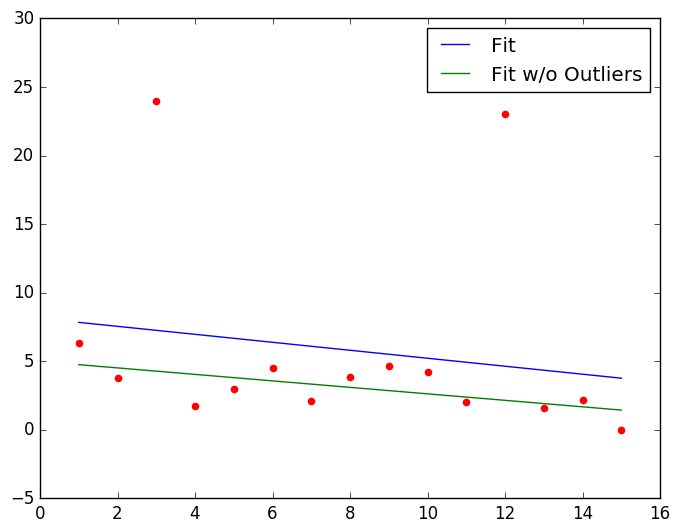

PyObject <matplotlib.legend.Legend object at 0x7f4fc2ca2f98>

In [11]:
using PyPlot
scatter(x[:,1], y, color="r")
plot(x[:,1] ,x*param_with_outliers, label="Fit")
plot(x[:,1], x*param_without_outliers, label= "Fit w/o Outliers" )
legend()

The fit without the outliers does a much better job of fitting the non outlier data then does the regression done on all the points. Both regressions result in  approximately the same slope, but because of the outliers, the regression on all points resulted in a linear function with a visibly higher y intercept.

## b.

In [15]:
using JuMP
# create a 1 norm model
m = Model()
@variable(m, p[1:2])
@variable(m, l[1:15] >= 0)
@constraint(m, l .>= (y - x *p))
@constraint(m, l .>= -(y - x*p))
@objective(m, Min, sum(l))
solve(m)

:Optimal

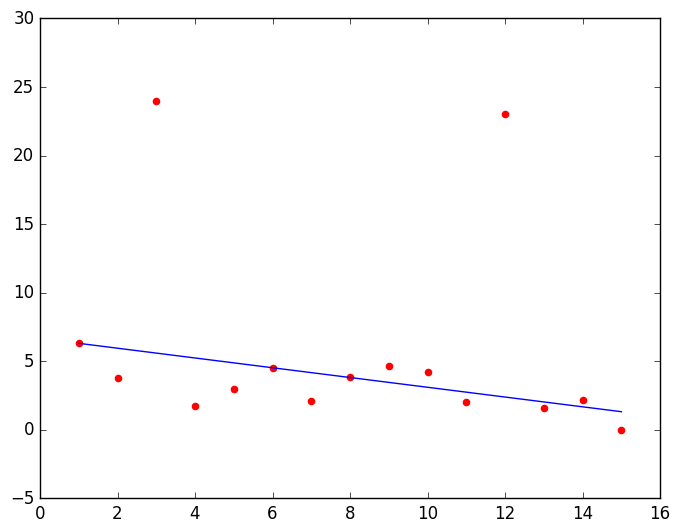

PyObject <matplotlib.collections.PathCollection object at 0x7f4fc238b908>

In [18]:
# plot l1 fit
l1_param = getvalue(p)
plot(x[:,1], x*l1_param)
scatter(x[:,1],y, color="r")

As you can see, clearly the L1 norm handles outliers better than the L2 norm. The line goes more or less throught the center of the non outlier in the L1 regression, whereas in the L2 regression, the line was above the data. This is because the cost function in the L1 function is linear with respect to distance from the regression line, whereas with the L2 norm, it's quadratic. Because of this outliers have much more effect in the L2 norm than they do with the L1 norm.

In [47]:
#Verifying that model gives same graph
using JuMP, Gurobi
x_huber = zeros(100)
x_huber[:] = linspace(-3,3,100)
y_huber = zeros(100)
M = 1
for i in 1:100
    m = Model()
    @variable(m, w)
    @variable(m, v >= 0)
    @constraint(m, abs(x_huber[i]) <= w + v)
    @constraint(m, w <= M)
    @objective(m, Min, w^2 + 2M*v)
    solve(m)
    y_huber[i] = getobjectivevalue(m)
end


Optimize a model with 2 rows, 2 columns and 3 nonzeros
Model has 1 quadratic objective term
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 2e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 3e+00]
Presolve removed 2 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.00 seconds
Optimal objective 5.00000000e+00
Optimize a model with 2 rows, 2 columns and 3 nonzeros
Model has 1 quadratic objective term
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 2e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 3e+00]
Presolve removed 2 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.00 seconds
Optimal objective 4.87878788e+00
Optimize a model with 2 rows, 2 columns and 3 nonzeros
M

Verifying huber plot. Looks good

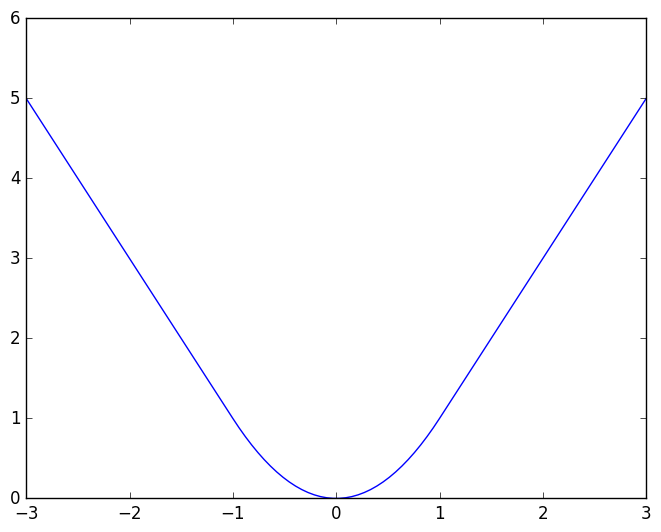

(0,6)

In [48]:
plot(x_huber,y_huber)
xlim(-3,3)
ylim(0,6)


In [49]:
#Now do fit with huber
m = Model()
@variable(m, p[1:2])
@variable(m, w[1:15])
@variable(m, v[1:15] >= 0)
@constraint(m, x*p - y .<= (w + v))
@constraint(m, -(x*p - y) .<= (w + v))

@constraint(m, w .<= M)
@objective(m, Min, sum(w.^2 + 2M*v))
solve(m)

Optimize a model with 45 rows, 32 columns and 135 nonzeros
Model has 15 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [2e+00, 2e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-02, 2e+01]
Presolve removed 15 rows and 0 columns
Presolve time: 0.00s
Presolved: 30 rows, 32 columns, 120 nonzeros
Presolved model has 15 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Dense cols : 2
 Free vars  : 2
 AA' NZ     : 7.500e+01
 Factor NZ  : 1.080e+02
 Factor Ops : 3.800e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.09994877e+05 -2.99850223e+04  0.00e+00 1.00e+03  1.00e+06     0s
   1   1.41170553e+06 -1.10717831e+06  0.00e+00 3.69e+00  4.55e+04     0s
   2   2.11112505e+05 -1.60845142e+05  0.00e+00 3.69e-06  6.20e+03     0s
   3   2

:Optimal

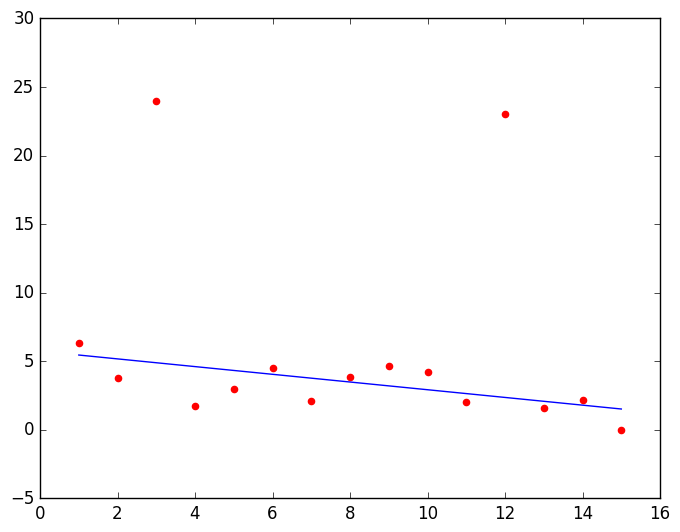

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4fc0a03080>

In [53]:
param = getvalue(p)
scatter(x[:,1], y, color="r")
plot(x[:,1], x*param)

# Q2
## a.

We write the constraint as 
$$
t(a^Tx + b) \geq || [1] ||
$$
and then
$$
|| [1] || \leq (ta)^Tx + tb
$$
So in this form
$A = 0$,   $b = [1]$,   $c = ta$,   $d = tb$

## b.

# Q3
## a.

This problem can be expressed as a geometric program,
$$
\text{minimize    } \alpha_4^{-1}T^{-1}r^{-2}
$$

$$
\text{subject to    } \frac{\alpha_1}{C_{max}}Tr^2 + \frac{\alpha_2}{C_{max}}r + \frac{\alpha_3}{C_{max}}rw \leq 1 
$$

$$
T_{min}T^{-1} \leq 1,\text{     }  T_{max}^{-1}T \leq 1
$$

$$
r_{min}r^{-1} \leq 1,\text{     } r_{max}^{-1}r \leq 1
$$

$$
w_{min}w^{-1} \leq 1,\text{     } w_{max}^{-1}w \leq 1
$$

$$
10wr^-1 \leq 1
$$

$$
r \geq 0, T \geq 0, w \geq 0
$$

Then let $T' = log(T)$,  $r' = log(r)$, $w' = log(w)$. 

Then our optimization is equivalent to solving,

$$
\text{minimize    } log\big ( exp({-log(a_4) -T' - 2r'}) \big )
$$

$$
\text{log} \big(
exp(log(\frac{\alpha_1}{C_{max}}) + T' + 2r') +
exp(log(\frac{\alpha_2}{C_{max}}) + r') +
exp(log(\frac{\alpha_3}{C_{max}}) + r' + w')
\big)
\leq 0
$$






$$
log\big(
exp(log(T_{min}) - T') 
\big)
\leq 0,
\text{     }  
log \big(
exp(-log(T_{max}) + T' )
\big)
\leq 0
$$

$$
log \big(
exp(log(r_{min}) - r') 
\big)
\leq 0,\text{     } 
\log \big(
exp(-log(r_{max}) + r')
\big )
\leq 0
$$

$$
log \big(
exp(log(w_{min}) -w')
\big) \leq 0,\text{     } 
log \big(
exp(-log(w_{max}) + w')
\big)
\leq 0
$$

$$
log \big( exp(log(10) + w' -r') \big) \leq 0
$$

which is convex since $log(exp(x))$ is a convex function and a convex function of a linear function is convex.


In [12]:
C_max = 500
using JuMP, Mosek
m = Model(solver=MosekSolver(LOG=0))
@variable(m, T_p)
@variable(m, r_p)
@variable(m, w_p)

@NLconstraint(m, log(
exp(log(1/C_max) + T_p + 2r_p) + 
exp(log(1/C_max) + r_p) + 
exp(log(1/C_max) + r_p + w_p)
) <= 0
)



@NLconstraint(m, log(
exp(log(10) + w_p - r_p))
<= 0
)

@objective(m, Min, T_p -2r_p)

solve(m)

MOSEK error 1291: The optimization problem is nonconvex.


LoadError: Mosek.MosekMathProgSolverInterface.MosekMathProgModelError("No solution available")

In [7]:
using JuMP, Mosek

m = Model(solver=MosekSolver(LOG=0))
@variable(m, x)
@NLconstraint(m, x^2 <= 100 )
@objective(m, Max, x)
solve(m)
getobjectivevalue(m)

9.999998526509987